The results in Cambridge EIS paper is quite fascinating. I will show how a new feature and different ML algorithms have improved the results. The Cambridge dataset contains 12 (45 mAh Eunicell LR2032) LiCoO 2
/graphite cells cycles at three different temperature 25 ◦ C (25C01–25C08), 35 ◦ C (35C01 and 35C02)
and 45 ◦ C (45C01 and 45C02) but the first 30 cycles of all cells underwent at 25 ◦ C before different
temperatures were set. The cells underwent 2C CC (constant current) discharge up to 3V and 1C CC-CV
(constant current–constant voltage) charge up to 4.2 V with EIS measurement at every even-numbered
cycle. The model is trained with a mixed set of temperature cells, four 25 ◦ C (25c01 - 25c04), one 35 ◦ C
(35C01), and one 45 ◦ C (45C01) cells, and all others as a testing set. Relevance Vector Machine (RVM)
algorithm is used to predict the RUL of cells with new features( [Z re (2) - Z re (1), Z re (3) - Z re (2), ...
Z re (60) - Z re (59), ... Z im (2) - Z im (1), ... Z im (60)-Z im (59)]).

In [28]:
import pandas as pd
import numpy as np
from impedance import preprocessing
from impedance import models
EIS_data=np.genfromtxt("EIS_data.txt")
RUL=np.genfromtxt("RUL.txt")
EIS_data_RUL=np.genfromtxt("EIS_data_RUL.txt")
EIS_data_35C02=np.genfromtxt("EIS_data_35C02.txt")
rul35C02=np.genfromtxt("rul35C02.txt")
capacity_data=np.genfromtxt("Capacity_data.txt")
capacity_35C02=np.genfromtxt("capacity35C02.txt")

In [23]:
from sklearn.metrics import mean_squared_error

def rmse(labels, predictions):
    mse = mean_squared_error(labels, predictions)
    return np.sqrt(mse)

Building Training and Testing Data with New features

In [46]:
from impedance import preprocessing
df=np.genfromtxt("EIS_state_V_25C01.txt",delimiter="\t")
Y_train=[]
Z25c01=np.zeros((118,238))
for k in range(1,119):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_train.append(234-2*k+2)

    for i in range(59):
        Z25c01[k-1,i]=real[i+1]-real[i]
        Z25c01[k-1,i+59]=img[i+1]-img[i]
    for i in range(60):
        Z25c01[k-1,i+118]=real[i]
        Z25c01[k-1,i+60+118]=img[i]
    
df=np.genfromtxt("EIS_state_V_25C02.txt",delimiter="\t")

Z25c02=np.zeros((82,238))
for k in range(1,83):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_train.append(162-2*k+2)
    
    for i in range(59):
        Z25c02[k-1,i]=real[i+1]-real[i]
        Z25c02[k-1,i+59]=img[i+1]-img[i]
    for i in range(60):
        Z25c02[k-1,i+118]=real[i]
        Z25c02[k-1,i+60+118]=img[i]
    
df=np.genfromtxt("EIS_state_V_25C03.txt",delimiter="\t")

Z25c03=np.zeros((7,238))
for k in range(1,8):
    
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_train.append(12-2*k+2)

    for i in range(59):
        Z25c03[k-1,i]=real[i+1]-real[i]
        Z25c03[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z25c03[k-1,i+118]=real[i]
        Z25c03[k-1,i+60+118]=img[i]
    
df=np.genfromtxt("EIS_state_V_35C01.txt",delimiter="\t")

Z35c01=np.zeros((110,238))
for k in range(1,111):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_train.append(218-2*k+2)
    for i in range(59):
        Z35c01[k-1,i]=real[i+1]-real[i]
        Z35c01[k-1,i+59]=img[i+1]-img[i] 
        
    for i in range(60):
        Z35c01[k-1,i+118]=real[i]
        Z35c01[k-1,i+60+118]=img[i]
    
df=np.genfromtxt("EIS_state_V_45C01.txt",delimiter="\t")

Z45=np.zeros((208,238))
for k in range(1,209):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_train.append(414-2*k+2)

    for i in range(59):
      
        Z45[k-1,i]=real[i+1]-real[i]
        Z45[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z45[k-1,i+118]=real[i]
        Z45[k-1,i+60+118]=img[i]
        
        
df=np.genfromtxt("EIS_state_V_25C04.txt",delimiter="\t")

Z25c04=np.zeros((81,238))
for k in range(1,82):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_train.append(160-2*k+2)

    for i in range(59):
      
        Z25c04[k-1,i]=real[i+1]-real[i]
        Z25c04[k-1,i+59]=img[i+1]-img[i]   
        
    for i in range(60):
        Z25c04[k-1,i+118]=real[i]
        Z25c04[k-1,i+60+118]=img[i]
        
df=np.genfromtxt("EIS_state_V_25C07.txt",delimiter="\t")        


X_train=np.zeros((606,238))
for i in range(118):
    X_train[i]=Z25c01[i]
for i in range(82):    
    X_train[118+i]=Z25c02[i]
for i in range(7):
    X_train[200+i]=Z25c03[i]
for i in range(110):
    X_train[207+i]=Z35c01[i]
for i in range(208):
    X_train[317+i]=Z45[i]
for i in range(81):
    X_train[525+i]=Z25c04[i]



Z45C02 Cell: Build Testing Data using new feature and then predict life using RVM algorithm

RMSE= 28.65965954299818


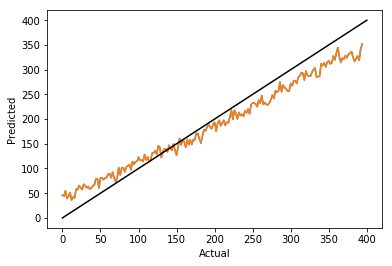

In [51]:
df=np.genfromtxt("EIS_state_V_45C02.txt",delimiter="\t")

Y_test=[]
Z45c02=np.zeros((198,238))
for k in range(1,199):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    
    Y_test.append(394-2*k+2)
    
    for i in range(59):
        Z45c02[k-1,i]=real[i+1]-real[i]
        Z45c02[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z45c02[k-1,i+118]=real[i]
        Z45c02[k-1,i+60+118]=img[i]
           
X_test=Z45c02

                      
# RVM algo to predict life    
                              
from skrvm import RVR
rvr = RVR(kernel='linear')
rvr.fit(X_train, Y_train)
from sklearn.metrics import mean_absolute_error
final_predictions = rvr.predict(X_test)
print("RMSE=",rmse(Y_test, final_predictions))

    
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.plot(Y_test,final_predictions)
ax.plot(Y_test,final_predictions)
ax.plot([0,400],[0,400], "k-")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show() 


Z35C02 Cell: Build Testing Data using new feature and then predict life using RVM algorithm

RMSE= 28.80712340924806


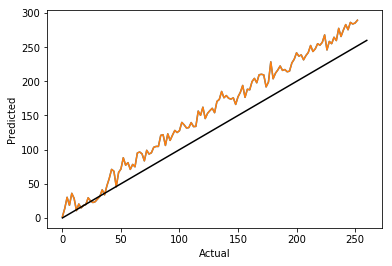

In [44]:
df=np.genfromtxt("EIS_state_V_35C02.txt",delimiter="\t")

Y_test=[]
Z35c02=np.zeros((127,238))
for k in range(1,128):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_test.append(252-2*k+2)
    
    for i in range(59):
        Z35c02[k-1,i]=real[i+1]-real[i]
        Z35c02[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z35c02[k-1,i+118]=real[i]
        Z35c02[k-1,i+60+118]=img[i]

X_test=Z35c02
                                 
# RVM algo to predict life    
                              
from skrvm import RVR
rvr = RVR(kernel='linear')
rvr.fit(X_train, Y_train)
from sklearn.metrics import mean_absolute_error
final_predictions = rvr.predict(X_test)
print("RMSE=",rmse(Y_test, final_predictions))

    
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.plot(Y_test,final_predictions)
ax.plot(Y_test,final_predictions)
ax.plot([0,260],[0,260], "k-")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()    

Z25C05 Cell: Build Testing Data using new feature and then predict life using RVM algorithm

RMSE= 10.51658144554607


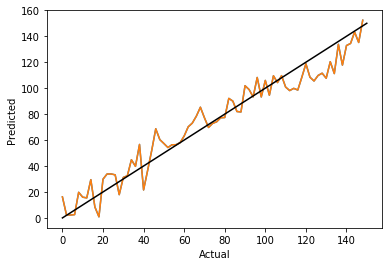

In [59]:
df=np.genfromtxt("EIS_state_V_25C05.txt",delimiter="\t")

Y_test=[]
Z25c05=np.zeros((75,238))
for k in range(1,76):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_test.append(148-2*k+2)

    for i in range(59):
        Z25c05[k-1,i]=real[i+1]-real[i]
        Z25c05[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z25c05[k-1,i+118]=real[i]
        Z25c05[k-1,i+60+118]=img[i]
        
X_test=Z25c05

# RVM algo to predict life    
                              
from skrvm import RVR
rvr = RVR(kernel='linear')
rvr.fit(X_train, Y_train)
from sklearn.metrics import mean_absolute_error
final_predictions = rvr.predict(X_test)
print("RMSE=",rmse(Y_test, final_predictions))

    
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.plot(Y_test,final_predictions)
ax.plot(Y_test,final_predictions)
ax.plot([0,150],[0,150], "k-")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show() 


Z35C06 Cell: Build Testing Data using new feature and then predict life using RVM algorithm

RMSE= 13.717663648178265


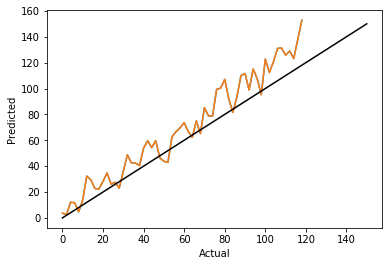

In [64]:
df=np.genfromtxt("EIS_state_V_25C06.txt",delimiter="\t")

Y_test=[]
Z25c06=np.zeros((60,238))
for k in range(1,61):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_test.append(118-2*k+2)

    for i in range(59):
        Z25c06[k-1,i]=real[i+1]-real[i]
        Z25c06[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z25c06[k-1,i+118]=real[i]
        Z25c06[k-1,i+60+118]=img[i]
        
X_test=Z25c06

# RVM algo to predict life    
                              
from skrvm import RVR
rvr = RVR(kernel='linear')
rvr.fit(X_train, Y_train)
from sklearn.metrics import mean_absolute_error
final_predictions = rvr.predict(X_test)
print("RMSE=",rmse(Y_test, final_predictions))

    
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.plot(Y_test,final_predictions)
ax.plot(Y_test,final_predictions)
ax.plot([0,150],[0,150], "k-")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show() 


Z35C08 Cell: Build Testing Data using new feature and then predict life using RVM algorithm

RMSE= 9.731892962120934


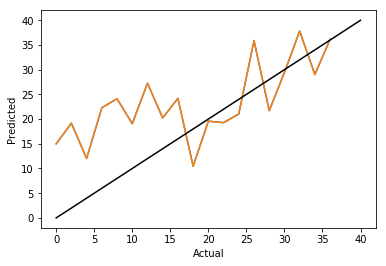

In [68]:
df=np.genfromtxt("EIS_state_V_25C08.txt",delimiter="\t")

Y_test=[]
Z25c08=np.zeros((19,238))
for k in range(1,20):
    fr,Z= preprocessing.readCSV('./exampleData.csv')
    freq=df[:,2][df[:,1]==k]
    real=df[:,3][df[:,1]==k]
    img=(df[:,4][df[:,1]==k])
    Y_test.append(36-2*k+2)

    for i in range(59):
        Z25c08[k-1,i]=real[i+1]-real[i]
        Z25c08[k-1,i+59]=img[i+1]-img[i]
        
    for i in range(60):
        Z25c08[k-1,i+118]=real[i]
        Z25c08[k-1,i+60+118]=img[i]
        
X_test=Z25c08

# RVM algo to predict life    
                              
from skrvm import RVR
rvr = RVR(kernel='linear')
rvr.fit(X_train, Y_train)
from sklearn.metrics import mean_absolute_error
final_predictions = rvr.predict(X_test)
print("RMSE=",rmse(Y_test, final_predictions))

    
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.plot(Y_test,final_predictions)
ax.plot(Y_test,final_predictions)
ax.plot([0,40],[0,40], "k-")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show() 

Cells - EOL

45C02 - 396

35C02 - 252

25C05 - 150

25C06 - 120

25C08 - 38

RMSE (cycles) by my model

28.6

28.8

10.5

13.7

9.7

RMSE (cycles) in Cambridge EIS Paper

32

36.5

15.5

18

5

For more infomation look into the report